# **Finding Missing Values**


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


##### Setup: Install Required Libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [ ]:
## Write your code here
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.3432

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [ ]:
## Write your code here
missing_values=df.isnull()
missing_values.head(5)

for column in missing_values.columns.values.tolist():
    print(missing_values[column].value_counts())
    print('')

ResponseId
False    65437
Name: count, dtype: int64

MainBranch
False    65437
Name: count, dtype: int64

Age
False    65437
Name: count, dtype: int64

Employment
False    65437
Name: count, dtype: int64

RemoteWork
False    54806
True     10631
Name: count, dtype: int64

Check
False    65437
Name: count, dtype: int64

CodingActivities
False    54466
True     10971
Name: count, dtype: int64

EdLevel
False    60784
True      4653
Name: count, dtype: int64

LearnCode
False    60488
True      4949
Name: count, dtype: int64

LearnCodeOnline
False    49237
True     16200
Name: count, dtype: int64

TechDoc
False    40897
True     24540
Name: count, dtype: int64

YearsCode
False    59869
True      5568
Name: count, dtype: int64

YearsCodePro
False    51610
True     13827
Name: count, dtype: int64

DevType
False    59445
True      5992
Name: count, dtype: int64

OrgSize
False    47480
True     17957
Name: count, dtype: int64

PurchaseInfluence
False    47406
True     18031
Name: count, dtype: 

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



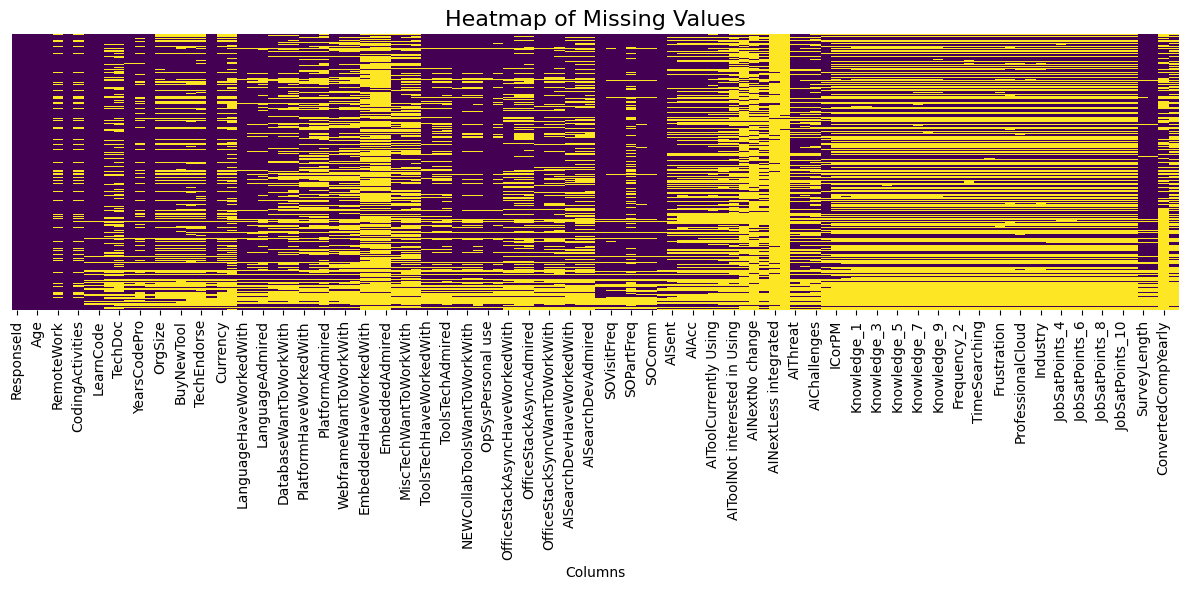

In [ ]:
## Write your code here
plt.figure(figsize=(12, 6))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values', fontsize=16)
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [ ]:
## Write your code here
print(missing_values['Employment'].isnull().value_counts())

Employment
False    65437
Name: count, dtype: int64


### 4. Imputing Missing Values



In [ ]:
## Write your code here
import numpy as np

#2
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)
    elif df[col].dtype == 'object':
        if not df[col].mode().empty:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(m

### 5. Visualizing Imputed Data
##### Task 6: Visualize the distribution of a column after imputation (e.g., `Employment`).


<ipython-input-9-10dc204a6997>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette='Set2')
<ipython-input-9-10dc204a6997>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


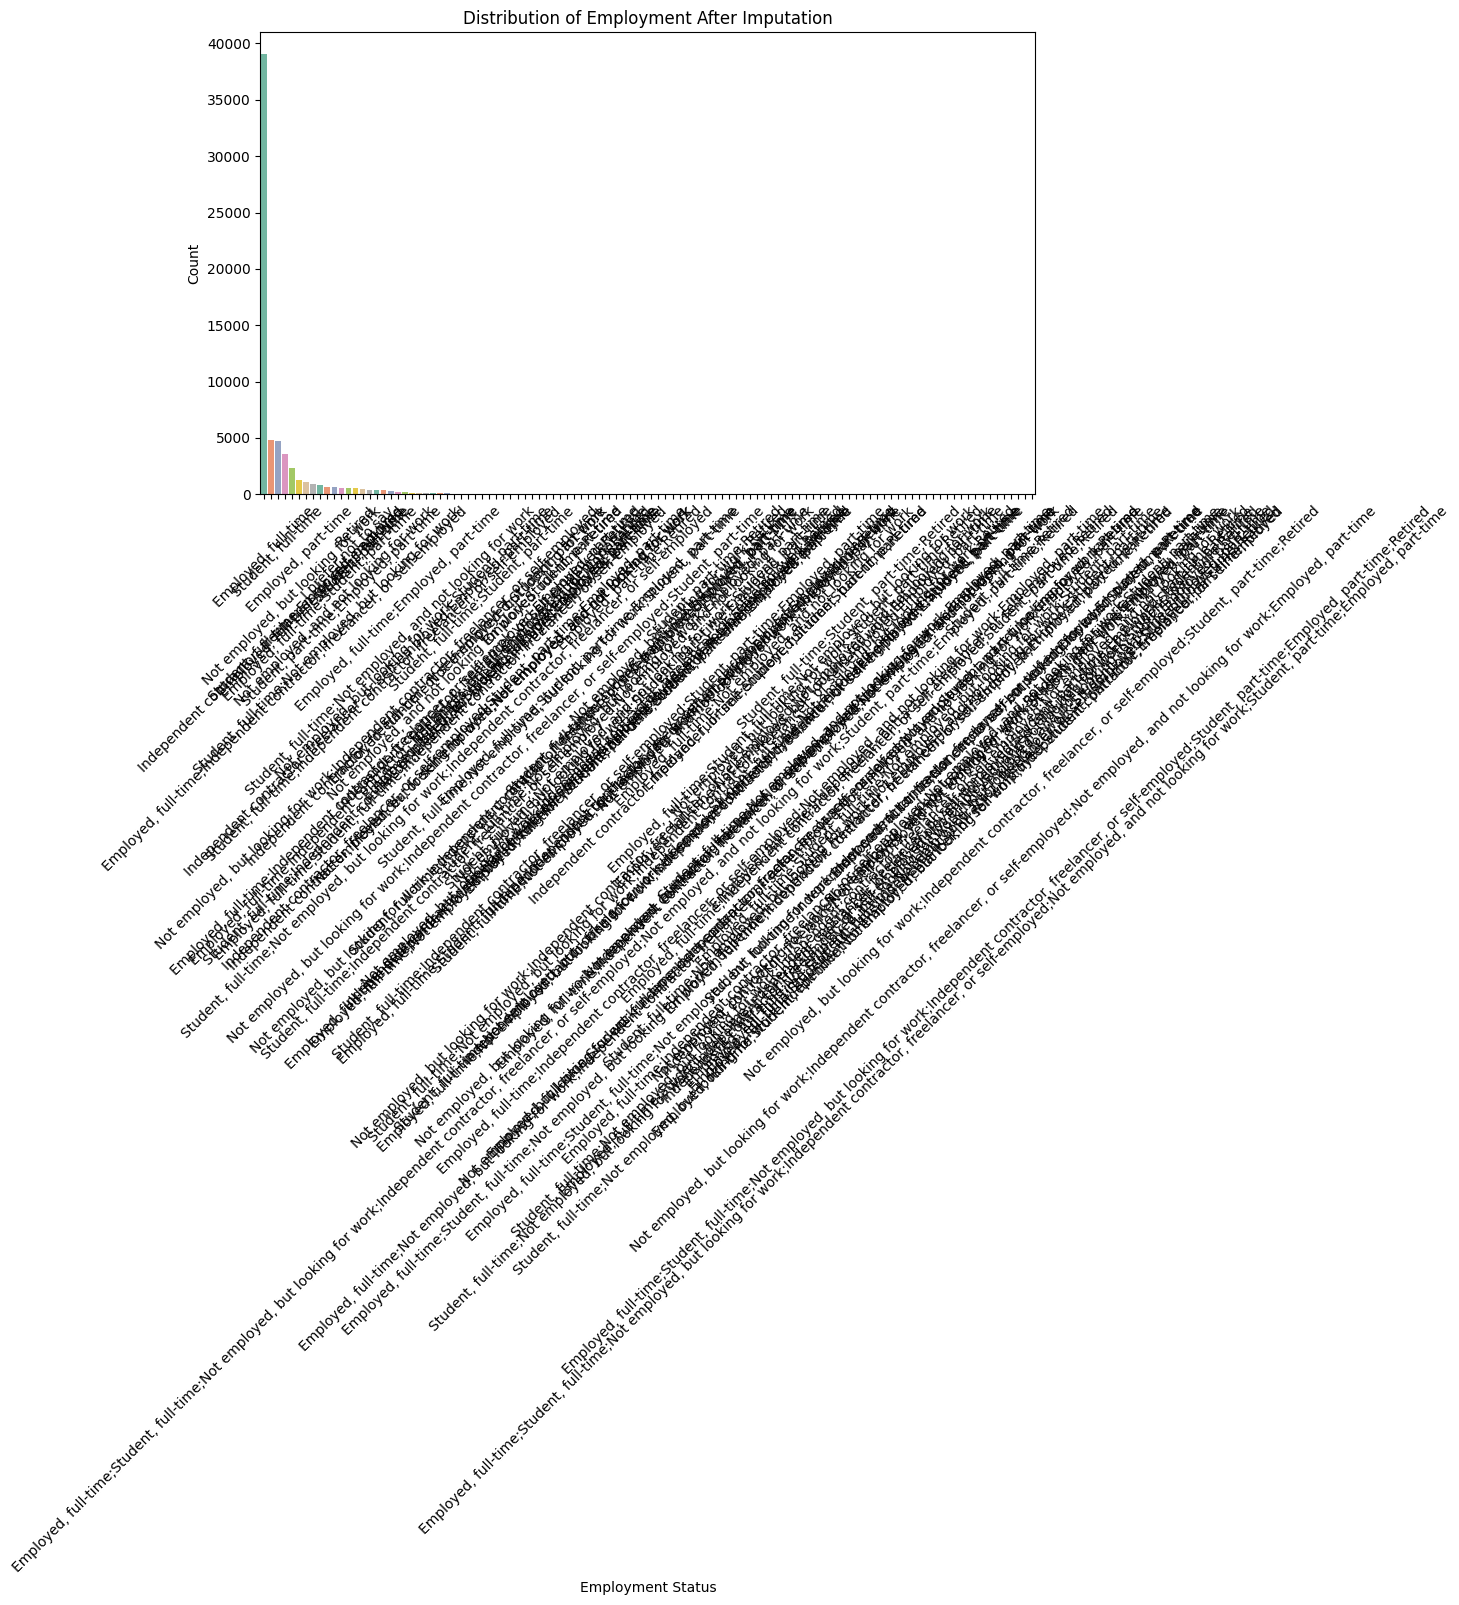

In [ ]:
## Write your code here
plt.figure(figsize=(10, 6))

# Plot distribution
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette='Set2')
plt.title('Distribution of Employment After Imputation')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()